In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:

trader = pd.read_csv('/content/drive/MyDrive/Analyzing_Trader_Behavior_During_Fear_and_Greed/csv_files/trader_data.csv')
sentiment = pd.read_csv('/content/drive/MyDrive/Analyzing_Trader_Behavior_During_Fear_and_Greed/csv_files/fear_greed.csv')


print("Trader Data:")
display(trader.head())

print("\nSentiment Data:")
display(sentiment.head())

Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [41]:
print("Trader Data info:")
trader.head()

print("\nSentiment Data info:")
sentiment.head()

print("\nTrader Data describe:")
trader.describe()



Trader Data info:

Sentiment Data info:

Trader Data describe:


,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [42]:
print("\nSentiment Data describe:")
display(sentiment.describe())


Sentiment Data describe:


,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [43]:
print("Missing Values in Trader Data:")
print(trader.isnull().sum())

print("\nMissing Values in Sentiment Data:")
print(sentiment.isnull().sum())

trader.drop_duplicates(inplace=True)
sentiment.drop_duplicates(inplace=True)

Missing Values in Trader Data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Missing Values in Sentiment Data:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [45]:
print(trader.columns)
print(sentiment.columns)

Index(['time', 'closedPnL', 'leverage', 'size', 'Date'], dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [44]:

trader.rename(columns={
    'Timestamp IST': 'time',   # full timestamp
    'Closed PnL': 'closedPnL', # profit/los
   'Size Tokens': 'leverage', # treat tokens as leverage
    'Size USD': 'size'
}, inplace=True)

trader = trader[['time', 'closedPnL', 'leverage', 'size']]

trader['time'] = pd.to_datetime(trader['time'], errors='coerce')

# Extract date part for daily analysis
trader['Date'] = trader['time'].dt.date

# Drop duplicates and any rows missing key values
trader.drop_duplicates(inplace=True)
trader.dropna(subset=['time', 'closedPnL', 'size', 'leverage'], inplace=True)

print("Cleaned Trader Data:")
display(trader.head())

Cleaned Trader Data:


,time,closedPnL,leverage,size,Date
0,2024-02-12 22:50:00,0.0,986.87,7872.16,2024-02-12
1,2024-02-12 22:50:00,0.0,16.00,127.68,2024-02-12
2,2024-02-12 22:50:00,0.0,144.09,1150.63,2024-02-12
3,2024-02-12 22:50:00,0.0,142.98,1142.04,2024-02-12
4,2024-02-12 22:50:00,0.0,8.73,69.75,2024-02-12


In [46]:
sentiment.rename(columns={
    'date':'Date'}, inplace=True)
sentiment.rename(columns=lambda x: x.strip(), inplace=True)

sentiment['Date'] = pd.to_datetime(sentiment['Date'], errors='coerce')
sentiment['Date'] = sentiment['Date'].dt.date

sentiment.drop_duplicates(inplace=True)
sentiment.dropna(subset=['Date'], inplace=True)

print("Cleaned Sentiment Data:")
display(sentiment.head())

Cleaned Sentiment Data:


,timestamp,value,classification,Date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [47]:
print("Trader Data Info:")
trader.info()

print("\nSentiment Data Info:")
sentiment.info()

print("\nTrader Data Range:")
print("From:", trader['Date'].min(), "To:", trader['Date'].max())

print("\nSentiment Data Range:")
print("From:", sentiment['Date'].min(), "To:", sentiment['Date'].max())

Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 69677 entries, 0 to 210649
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       69677 non-null  datetime64[ns]
 1   closedPnL  69677 non-null  float64       
 2   leverage   69677 non-null  float64       
 3   size       69677 non-null  float64       
 4   Date       69677 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 3.2+ MB

Sentiment Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   Date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Trader Data Range:
From: 2023-01-0

In [48]:
merged_df = pd.merge(trader, sentiment, on='Date', how='inner')

print("Merged Data Sample:")
display(merged_df.head())

Merged Data Sample:


,time,closedPnL,leverage,size,Date,timestamp,value,classification
0,2024-02-12 22:50:00,0.0,986.87,7872.16,2024-02-12,1707715800,70,Greed
1,2024-02-12 22:50:00,0.0,16.00,127.68,2024-02-12,1707715800,70,Greed
2,2024-02-12 22:50:00,0.0,144.09,1150.63,2024-02-12,1707715800,70,Greed
3,2024-02-12 22:50:00,0.0,142.98,1142.04,2024-02-12,1707715800,70,Greed
4,2024-02-12 22:50:00,0.0,8.73,69.75,2024-02-12,1707715800,70,Greed


In [49]:
print("Merged Data Info:")
merged_df.info()

print("\nMissing Values After Merge:")
print(merged_df.isnull().sum())

print("\nMerged Date Range:")
print("From:", merged_df['Date'].min(), "To:", merged_df['Date'].max())

Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32541 entries, 0 to 32540
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            32541 non-null  datetime64[ns]
 1   closedPnL       32541 non-null  float64       
 2   leverage        32541 non-null  float64       
 3   size            32541 non-null  float64       
 4   Date            32541 non-null  object        
 5   timestamp       32541 non-null  int64         
 6   value           32541 non-null  int64         
 7   classification  32541 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 2.0+ MB

Missing Values After Merge:
time              0
closedPnL         0
leverage          0
size              0
Date              0
timestamp         0
value             0
classification    0
dtype: int64

Merged Date Range:
From: 2023-01-05 To: 2025-05-02


In [50]:
avg_profit = merged_df.groupby('classification')['closedPnL'].mean().reset_index()
avg_profit.columns = ['Sentiment', 'Average Profit']
print("Average Profit by Sentiment:")
display(avg_profit)

Average Profit by Sentiment:


,Sentiment,Average Profit
0,Extreme Fear,2.042337
1,Extreme Greed,214.318952
2,Fear,132.348392
3,Greed,56.557043
4,Neutral,28.542364


In [51]:
avg_leverage = merged_df.groupby('classification')['leverage'].mean().reset_index()
avg_leverage.columns = ['Sentiment', 'Average Leverage']
print("Average Leverage by Sentiment:")
display(avg_leverage)

Average Leverage by Sentiment:


,Sentiment,Average Leverage
0,Extreme Fear,2721.182076
1,Extreme Greed,17516.675467
2,Fear,3457.844670
3,Greed,15936.625951
4,Neutral,18880.743418


In [52]:
avg_size = merged_df.groupby('classification')['size'].mean().reset_index()
avg_size.columns = ['Sentiment', 'Average Trade Size']
print("Average Trade Size by Sentiment:")
display(avg_size)

Average Trade Size by Sentiment:


,Sentiment,Average Trade Size
0,Extreme Fear,4396.829746
1,Extreme Greed,3416.809630
2,Fear,6221.855005
3,Greed,5352.744786
4,Neutral,4630.999992


In [ ]:
summary = merged_df.groupby('classification').agg({
    'closedPnL': 'mean',
    'leverage': 'mean',
    'size': 'mean'
}).reset_index()

summary.columns = ['Sentiment', 'Avg Profit', 'Avg Leverage', 'Avg Trade Size']
display(summary)

In [53]:
merged_df.to_csv('/content/drive/MyDrive/Analyzing_Trader_Behavior_During_Fear_and_Greed/outputs/merged_data.csv', index=False)

In [54]:
merged_df

,time,closedPnL,leverage,size,Date,timestamp,value,classification
0,2024-02-12 22:50:00,0.0,986.8700,7872.16,2024-02-12,1707715800,70,Greed
1,2024-02-12 22:50:00,0.0,16.0000,127.68,2024-02-12,1707715800,70,Greed
2,2024-02-12 22:50:00,0.0,144.0900,1150.63,2024-02-12,1707715800,70,Greed
3,2024-02-12 22:50:00,0.0,142.9800,1142.04,2024-02-12,1707715800,70,Greed
4,2024-02-12 22:50:00,0.0,8.7300,69.75,2024-02-12,1707715800,70,Greed
...,...,...,...,...,...,...,...,...
32536,2025-04-01 21:53:00,0.0,0.1387,503.06,2025-04-01,1743485400,34,Fear
32537,2025-04-01 21:53:00,0.0,2.9050,10536.43,2025-04-01,1743485400,34,Fear
32538,2025-04-01 21:53:00,0.0,0.8280,3003.16,2025-04-01,1743485400,34,Fear
32539,2025-04-01 21:53:00,0.0,0.7642,2771.75,2025-04-01,1743485400,34,Fear


# Average Profit(Fear vs Greed)


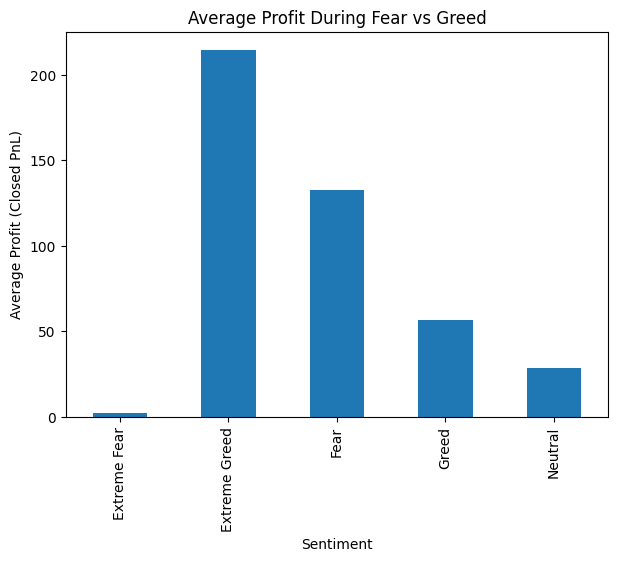

In [56]:
avg_profit = merged_df.groupby('classification')['closedPnL'].mean()

plt.figure(figsize=(7,5))
avg_profit.plot(kind='bar')
plt.title("Average Profit During Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Average Profit (Closed PnL)")
plt.show()

In [63]:
plt.savefig("/content/drive/MyDrive/Analyzing_Trader_Behavior_During_Fear_and_Greed/outputs/charts/Average Profit During Fear vs Greed.png")

<Figure size 640x480 with 0 Axes>

# Average Leverage


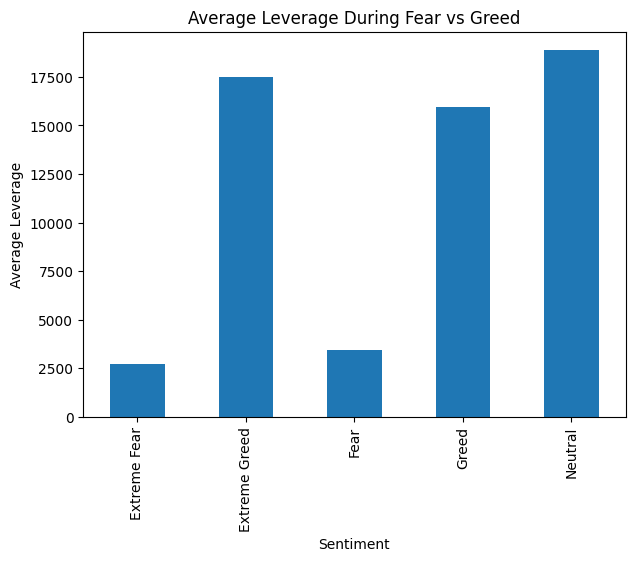

In [57]:
avg_leverage = merged_df.groupby('classification')['leverage'].mean()

plt.figure(figsize=(7,5))
avg_leverage.plot(kind='bar')
plt.title("Average Leverage During Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Average Leverage")
plt.show()

In [60]:
plt.savefig("/content/drive/MyDrive/Analyzing_Trader_Behavior_During_Fear_and_Greed/outputs/charts/avg_leverage_vs_sentiment.png")

<Figure size 640x480 with 0 Axes>

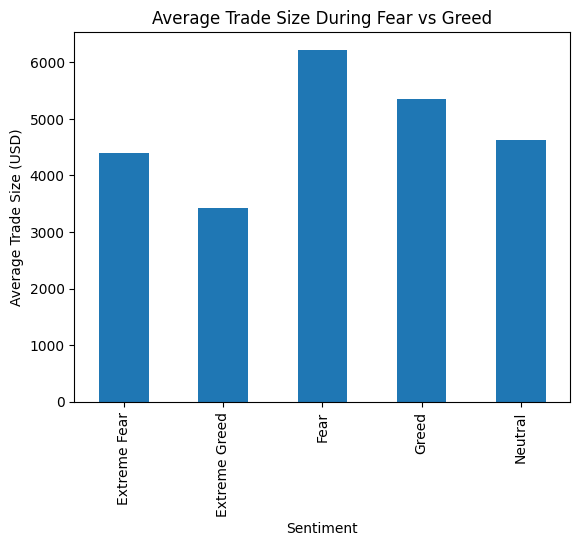

In [65]:

merged_df.groupby('classification')['size'].mean().plot(kind='bar')

plt.title("Average Trade Size During Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.show()

In [66]:
plt.savefig("/content/drive/MyDrive/Analyzing_Trader_Behavior_During_Fear_and_Greed/outputs/charts/Average Trade Size During Fear vs Greed.png")

<Figure size 640x480 with 0 Axes>